In [2]:
import pandas as pd
import itertools
import json
from statistics import mean
from tqdm import tqdm
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
tqdm.pandas()

In [3]:
train_df = pd.read_csv("data/train/train_flag.csv")

In [4]:
train_df

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0
...,...,...,...
261378,BAO14050568,Cash loans,0
261379,NDO00278120,Cash loans,0
261380,LDY78194712,Cash loans,0
261381,EVH98380736,Revolving loans,0


In [5]:
train_df['TARGET'].value_counts()

TARGET
0    240326
1     21057
Name: count, dtype: int64

In [6]:
train_df['TARGET'].value_counts(normalize=True)*100

TARGET
0    91.944006
1     8.055994
Name: proportion, dtype: float64

In [7]:
train_df.nunique()

uid                   261383
NAME_CONTRACT_TYPE         2
TARGET                     2
dtype: int64

In [8]:
train_df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         236524
Revolving loans     24859
Name: count, dtype: int64

In [9]:
def dataframe_from_json(filepath):
    with open(filepath) as f:
        data = json.load(f)
    data = list(itertools.chain(*data))
    return pd.DataFrame.from_dict(data)


In [10]:
enquiry_data_train = dataframe_from_json("data/train/enquiry_data_train.json")

In [11]:
enquiry_data_train

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248
...,...,...,...,...
1909921,Loan for the purchase of equipment,401073,2020-02-23,ZZZ93377613
1909922,Consumer credit,224844,2018-06-03,ZZZ93377613
1909923,Loan for purchase of shares (margin lending),416642,2017-10-15,ZZZ93377613
1909924,Loan for purchase of shares (margin lending),22000,2020-08-22,ZZZ93377613


In [12]:
enquiry_data_train.nunique()

enquiry_type        17
enquiry_amt     151941
enquiry_date      1776
uid             261383
dtype: int64

In [13]:
enquiry_data_train['enquiry_type'].value_counts()

enquiry_type
Cash loans                                      303108
Revolving loans                                 120181
Mobile operator loan                             99479
Real estate loan                                 99328
Microloan                                        99324
Unknown type of loan                             99280
Loan for purchase of shares (margin lending)     99230
Mortgage                                         99216
Credit card                                      99208
Another type of loan                             99154
Loan for the purchase of equipment               99152
Interbank credit                                 99063
Car loan                                         98994
Loan for business development                    98900
Cash loan (non-earmarked)                        98831
Loan for working capital replenishment           98814
Consumer credit                                  98664
Name: count, dtype: int64

In [14]:
accounts_data_train = dataframe_from_json("data/train/accounts_data_train.json")

In [15]:
accounts_data_train

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915
...,...,...,...,...,...,...,...
1245305,Consumer credit,100116.000,0.0,2017-05-12,2017-06-15,000,ZZZ93377613
1245306,Consumer credit,34839.000,0.0,2016-11-11,2017-12-17,000000000000000000000000000000000000000,ZZZ93377613
1245307,Consumer credit,18589.500,0.0,2015-12-10,2016-05-12,000000000000000,ZZZ93377613
1245308,Consumer credit,24997.500,0.0,2020-09-19,NaN,000000000,ZZZ93377613


In [16]:
accounts_data_train['credit_type'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Loan for business development', 'Microloan',
       'Another type of loan', 'Loan for working capital replenishment',
       'Unknown type of loan', 'Loan for the purchase of equipment',
       'Real estate loan', 'Cash loan (non-earmarked)',
       'Loan for purchase of shares (margin lending)', 'Interbank credit',
       'Mobile operator loan'], dtype=object)

In [17]:
# loan_types = {'Consumer credit': 'Revolving loans',
#               'Credit card': 'Revolving loans',
#               'Mortgage': 'Cash loans',
#               'Car loan': 'Cash loans',
#               'Loan for business development': 'Cash loans',
#               'Microloan': 'Revolving loans',
#               'Another type of loan': 'Revolving loans',
#               'Loan for working capital replenishment': 'Revolving loans',
#               'Unknown type of loan': 'Revolving loans',
#               'Loan for the purchase of equipment': 'Cash loans',
#               'Real estate loan': 'Cash loans',
#               'Cash loan (non-earmarked)': 'Cash loans',
#               'Loan for purchase of shares (margin lending)': 'Cash loans',
#               'Interbank credit': 'Revolving loans',
#               'Mobile operator loan': 'Revolving loans'}

In [18]:
# accounts_data_train['credit_type'] = accounts_data_train['credit_type'].replace(loan_types)

In [19]:
accounts_data_train.loc[:, 'active_loan'] = accounts_data_train['closed_date'].progress_apply(lambda x: 0 if isinstance(x, str) else 1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1245310/1245310 [00:00<00:00, 2103624.31it/s]


In [20]:
def get_repayment_history(payment_hist_string):
    if isinstance(payment_hist_string, str):
        return [int(payment_hist_string[i:i+3]) for i in range(0, len(payment_hist_string), 3)]
    return []


In [21]:
%%time
accounts_data_train.loc[:, 'repayment_history'] = accounts_data_train['payment_hist_string'].progress_apply(get_repayment_history)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1245310/1245310 [00:04<00:00, 254948.66it/s]

CPU times: user 4.81 s, sys: 79 ms, total: 4.89 s
Wall time: 4.91 s


In [22]:
# accounts_data_train.loc[:, 'max_pay_delay'] = accounts_data_train['repayment_history'].progress_apply(lambda x: max(x) if x else 0)
accounts_data_train.loc[:, 'mean_pay_delay'] = accounts_data_train['repayment_history'].progress_apply(lambda x: mean(x) if x else 0)
# accounts_data_train.loc[:, 'total_pay_delay'] = accounts_data_train['repayment_history'].progress_apply(lambda x: sum(x))
# accounts_data_train.loc[:, 'total_pay_delay_count'] = accounts_data_train['repayment_history'].progress_apply(lambda x: sum(val > 0 for val in x))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1245310/1245310 [00:05<00:00, 246745.36it/s]


/Users/krakesh.kumar/miniconda3/envs/llm_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


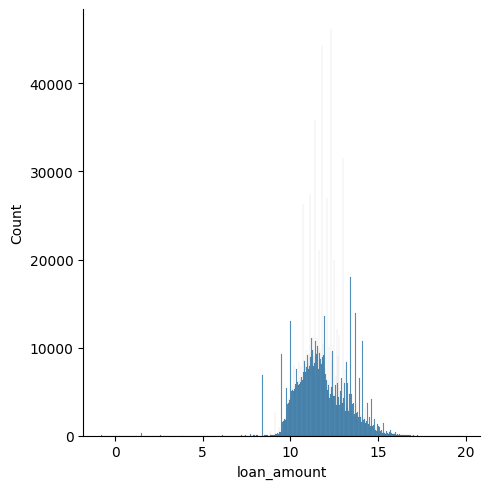

In [23]:
sns.displot(np.log(accounts_data_train['loan_amount']))

In [24]:
accounts_data_train

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,active_loan,repayment_history,mean_pay_delay
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,0,"[0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0,...",0.588235
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,0,"[0, 0, 0, 0, 0, 14, 44, 0, 0, 0, 0, 0, 0, 0, 0...",3.625000
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,1,"[0, 0, 0, 0, 0, 0]",0.000000
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,0,"[0, 0, 0]",0.000000
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",190.486842
...,...,...,...,...,...,...,...,...,...,...
1245305,Consumer credit,100116.000,0.0,2017-05-12,2017-06-15,000,ZZZ93377613,0,[0],0.000000
1245306,Consumer credit,34839.000,0.0,2016-11-11,2017-12-17,000000000000000000000000000000000000000,ZZZ93377613,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000
1245307,Consumer credit,18589.500,0.0,2015-12-10,2016-05-12,000000000000000,ZZZ93377613,0,"[0, 0, 0, 0, 0]",0.000000
1245308,Consumer credit,24997.500,0.0,2020-09-19,NaN,000000000,ZZZ93377613,1,"[0, 0, 0]",0.000000


In [25]:
filt_accounts_data_train = accounts_data_train[['loan_amount', 'amount_overdue', 'uid', 'active_loan', 'mean_pay_delay']]
filt_accounts_data_train                                  

,loan_amount,amount_overdue,uid,active_loan,mean_pay_delay
0,272745.000,0.0,AAA09044550,0,0.588235
1,4500.000,0.0,AAA09044550,0,3.625000
2,80996.445,0.0,AAA10545297,1,0.000000
3,43771.500,0.0,AAA14112888,0,0.000000
4,10480.500,0.0,AAA20326915,1,190.486842
...,...,...,...,...,...
1245305,100116.000,0.0,ZZZ93377613,0,0.000000
1245306,34839.000,0.0,ZZZ93377613,0,0.000000
1245307,18589.500,0.0,ZZZ93377613,0,0.000000
1245308,24997.500,0.0,ZZZ93377613,1,0.000000


#### aggregating on uid

In [26]:
grouped_df = filt_accounts_data_train.groupby(['uid'])

agg_df = grouped_df.agg({
    'loan_amount': ['count', 'mean'],         # Count the number of loans for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    'amount_overdue': 'mean',         # Latest closed date for each candidate
    # 'amount_overdue': ,           # Latest closed date for each candidate
    'active_loan': 'sum',
    # 'max_pay_delay': 'mean',
    'mean_pay_delay': 'mean'
    # 'total_pay_delay_count': 'mean',
    # 'enquiry_amt': ['sum', 'mean'],   # Take the payment history string from the first loan
    # # 'enquiry_amt': ,   # Take the payment history string from the first loan
    # 'loan_to_enquire_percent': 'mean'
})

In [27]:
agg_df

loan_amount               amount_overdue active_loan  \
                  count          mean           mean         sum   
uid                                                                
AAA09044550           2  1.386225e+05            0.0           0   
AAA10545297           1  8.099645e+04            0.0           1   
AAA14112888           1  4.377150e+04            0.0           0   
AAA20326915           8  7.394962e+04            0.0           3   
AAA31604840           5  3.183921e+05            0.0           3   
...                 ...           ...            ...         ...   
ZZZ74526004           3  3.786450e+04            0.0           0   
ZZZ78449185           7  9.283436e+04            0.0           0   
ZZZ79008454           3  1.672022e+06        42420.0           2   
ZZZ81253108           4  1.334430e+06            0.0           3   
ZZZ93377613           8  5.921775e+04            0.0           1   

            mean_pay_delay  
                      mean  
uid                         
AAA09044550       2.106618  
AAA10545297       0.000000  
AAA14112888       0.000000  
AAA20326915      23.810855  
AAA31604840       0.000000  
...                    ...  
ZZZ74526004       3.000000  
ZZZ78449185       0.051948  
ZZZ79008454       1.729675  
ZZZ81253108       0.825000  
ZZZ93377613       0.000000  

[223918 rows x 5 columns]

In [28]:
new_columns = [f'{level1}_{level2}' for level1, level2 in agg_df.columns]
new_columns

agg_df.columns = new_columns
agg_df = agg_df.reset_index()

In [29]:
agg_df

,uid,loan_amount_count,loan_amount_mean,amount_overdue_mean,active_loan_sum,mean_pay_delay_mean
0,AAA09044550,2,1.386225e+05,0.0,0,2.106618
1,AAA10545297,1,8.099645e+04,0.0,1,0.000000
2,AAA14112888,1,4.377150e+04,0.0,0,0.000000
3,AAA20326915,8,7.394962e+04,0.0,3,23.810855
4,AAA31604840,5,3.183921e+05,0.0,3,0.000000
...,...,...,...,...,...,...
223913,ZZZ74526004,3,3.786450e+04,0.0,0,3.000000
223914,ZZZ78449185,7,9.283436e+04,0.0,0,0.051948
223915,ZZZ79008454,3,1.672022e+06,42420.0,2,1.729675
223916,ZZZ81253108,4,1.334430e+06,0.0,3,0.825000


### Candidates who never got loan

In [30]:
new_candidates = list(set(train_df['uid']) - set(accounts_data_train['uid']))

In [59]:
new_candidates

['FBH36585110',
 'QEN11573392',
 'DHE03120019',
 'MBF79403550',
 'GGG13145919',
 'MNE07626072',
 'ADH49626919',
 'PEJ19211104',
 'JKU84746316',
 'LMV86652320',
 'XLE65597727',
 'FIA36230976',
 'OXH03461462',
 'PYJ65215731',
 'QQG03936655',
 'PHG07745526',
 'IMZ23930308',
 'PQG45109006',
 'VPS66869501',
 'QXH81493522',
 'MLP45091495',
 'EIG90763655',
 'CSR10415025',
 'JJP04104393',
 'NBX47718727',
 'YQJ05947010',
 'ZAV69548728',
 'WLB07995891',
 'DTP62067523',
 'CDP70195541',
 'MYW72057449',
 'QMU67164651',
 'AND60919531',
 'ZCY42453866',
 'EWS67221797',
 'KZS49422340',
 'QTT54903292',
 'JEH87755401',
 'DJJ31839365',
 'WLO74647512',
 'FYQ94546193',
 'RLU95584382',
 'YKR86041328',
 'XMZ87251783',
 'IBP23606715',
 'MZD80386863',
 'LMW66182814',
 'VUC30685207',
 'ODF17538406',
 'SSB24369309',
 'BUI82590490',
 'QON82026728',
 'BJO25612798',
 'LEG54703132',
 'RED69211645',
 'BPS15216667',
 'YDR83355580',
 'ZPU30330791',
 'HUD71592304',
 'OCX75769683',
 'XKM77317505',
 'CKH02096098',
 'FTL496

In [60]:
train_df[train_df['uid'].isin(new_candidates)][train_df['TARGET']==1]

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_11667/4138099896.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df['uid'].isin(new_candidates)][train_df['TARGET']==1]


,uid,NAME_CONTRACT_TYPE,TARGET
7,DBK56652751,Cash loans,1
27,GYL79147955,Cash loans,1
57,IZA89471001,Cash loans,1
154,OBO11031206,Cash loans,1
208,GJH87604150,Revolving loans,1
...,...,...,...
261036,DAG44307290,Cash loans,1
261048,CMD94319821,Cash loans,1
261260,WMV65564465,Cash loans,1
261267,GRP65374653,Cash loans,1


In [61]:
train_df[train_df['uid'].isin(new_candidates)][train_df['TARGET']==0]

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_11667/3695093113.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[train_df['uid'].isin(new_candidates)][train_df['TARGET']==0]


,uid,NAME_CONTRACT_TYPE,TARGET
4,WJZ68772744,Cash loans,0
13,VJY65237599,Cash loans,0
25,CDR05672029,Cash loans,0
47,HZP90319929,Revolving loans,0
80,FRP48962721,Cash loans,0
...,...,...,...
261350,HED82146223,Cash loans,0
261357,NKC15771473,Cash loans,0
261361,PJK40550802,Cash loans,0
261376,RJY83457377,Cash loans,0


In [62]:
new_can_train_df = train_df[train_df['uid'].isin(new_candidates)]

In [63]:
new_can_train_df

,uid,NAME_CONTRACT_TYPE,TARGET
4,WJZ68772744,Cash loans,0
7,DBK56652751,Cash loans,1
13,VJY65237599,Cash loans,0
25,CDR05672029,Cash loans,0
27,GYL79147955,Cash loans,1
...,...,...,...
261354,BZF21478094,Cash loans,1
261357,NKC15771473,Cash loans,0
261361,PJK40550802,Cash loans,0
261376,RJY83457377,Cash loans,0


In [64]:
new_can_enquiry_data_train = enquiry_data_train[enquiry_data_train['uid'].isin(new_candidates)]

In [65]:
new_can_enquiry_data_train

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248
...,...,...,...,...
1909871,Car loan,439084,2018-01-15,ZZZ74133043
1909872,Revolving loans,261841,2018-11-22,ZZZ74133043
1909873,Microloan,25848,2020-11-15,ZZZ74133043
1909874,Revolving loans,459673,2019-10-29,ZZZ74133043


In [66]:
combined_df = pd.merge(new_can_enquiry_data_train, train_df, on='uid', how='left').reset_index(drop=True)
combined_df

,enquiry_type,enquiry_amt,enquiry_date,uid,NAME_CONTRACT_TYPE,TARGET
0,Interbank credit,168839,2020-11-08,AAA08065248,Revolving loans,0
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Revolving loans,0
2,Mobile operator loan,36082,2020-06-19,AAA08065248,Revolving loans,0
3,Interbank credit,180467,2019-10-22,AAA08065248,Revolving loans,0
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248,Revolving loans,0
...,...,...,...,...,...,...
273131,Car loan,439084,2018-01-15,ZZZ74133043,Revolving loans,1
273132,Revolving loans,261841,2018-11-22,ZZZ74133043,Revolving loans,1
273133,Microloan,25848,2020-11-15,ZZZ74133043,Revolving loans,1
273134,Revolving loans,459673,2019-10-29,ZZZ74133043,Revolving loans,1


In [67]:
# Extract year from date column
combined_df['year'] = pd.to_datetime(combined_df['enquiry_date']).dt.year

combined_df['month'] = pd.to_datetime(combined_df['enquiry_date']).dt.month

# Extract year-month from date column
combined_df['year_month'] = pd.to_datetime(combined_df['enquiry_date']).dt.to_period('M')

# Extract day from date column
combined_df['day'] = pd.to_datetime(combined_df['enquiry_date']).dt.weekday
combined_df

,enquiry_type,enquiry_amt,enquiry_date,uid,NAME_CONTRACT_TYPE,TARGET,year,month,year_month,day
0,Interbank credit,168839,2020-11-08,AAA08065248,Revolving loans,0,2020,11,2020-11,6
1,Mobile operator loan,268392,2020-09-20,AAA08065248,Revolving loans,0,2020,9,2020-09,6
2,Mobile operator loan,36082,2020-06-19,AAA08065248,Revolving loans,0,2020,6,2020-06,4
3,Interbank credit,180467,2019-10-22,AAA08065248,Revolving loans,0,2019,10,2019-10,1
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248,Revolving loans,0,2020,5,2020-05,6
...,...,...,...,...,...,...,...,...,...,...
273131,Car loan,439084,2018-01-15,ZZZ74133043,Revolving loans,1,2018,1,2018-01,0
273132,Revolving loans,261841,2018-11-22,ZZZ74133043,Revolving loans,1,2018,11,2018-11,3
273133,Microloan,25848,2020-11-15,ZZZ74133043,Revolving loans,1,2020,11,2020-11,6
273134,Revolving loans,459673,2019-10-29,ZZZ74133043,Revolving loans,1,2019,10,2019-10,1


TARGET       0      1
year                 
2015         2      1
2016       209     65
2017      2723    617
2018     15949   2513
2019     59018   7498
2020    166705  17106
2021       662     68


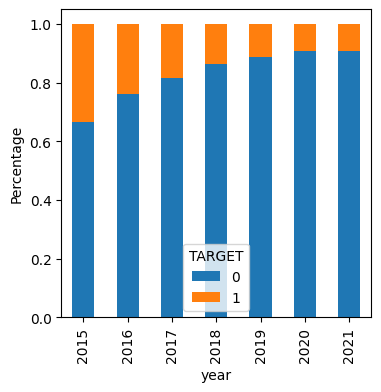

In [51]:
print(pd.crosstab(combined_df["year"],combined_df["TARGET"]))
Gender = pd.crosstab(combined_df["year"], combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("year")
plt.ylabel("Percentage")
plt.show()

TARGET      0     1
month              
1       12774  1606
2       12233  1489
3       14633  1770
4       15088  1862
5       17372  2000
6       18354  2064
7       20739  2377
8       22584  2573
9       24126  2686
10      27100  2911
11      28224  3074
12      32041  3456


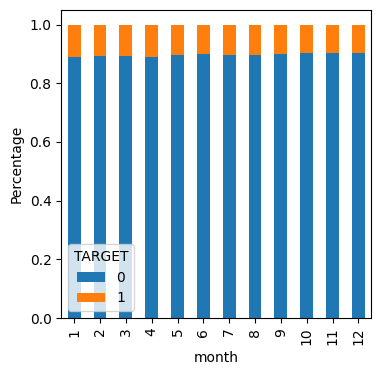

In [52]:
print(pd.crosstab(combined_df["month"],combined_df["TARGET"]))
Gender = pd.crosstab(combined_df["month"], combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("month")
plt.ylabel("Percentage")
plt.show()

TARGET          0     1
year_month             
2015-11         1     0
2015-12         1     1
2016-01         1     0
2016-02         2     3
2016-03         5     2
...           ...   ...
2020-09     16179  1625
2020-10     18009  1745
2020-11     18683  1867
2020-12     21078  1998
2021-01       662    68

[63 rows x 2 columns]


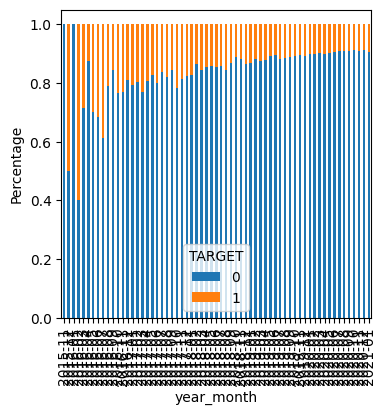

In [53]:
print(pd.crosstab(combined_df["year_month"],combined_df["TARGET"]))
Gender = pd.crosstab(combined_df["year_month"], combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("year_month")
plt.ylabel("Percentage")
plt.show()

TARGET      0     1
day                
0       35255  4028
1       34969  4008
2       35212  3928
3       34981  4014
4       35419  3999
5       34670  3938
6       34762  3953


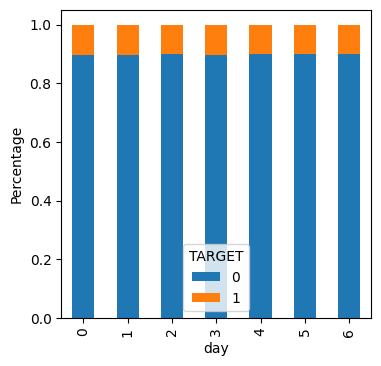

In [57]:
print(pd.crosstab(combined_df["day"],combined_df["TARGET"]))
Gender = pd.crosstab(combined_df["day"], combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("day")
plt.ylabel("Percentage")
plt.show()

TARGET                                            0     1
enquiry_type                                             
Another type of loan                          12781  1448
Car loan                                      12633  1483
Cash loan (non-earmarked)                     12475  1392
Cash loans                                    38614  4421
Consumer credit                               12818  1435
Credit card                                   12739  1481
Interbank credit                              12726  1407
Loan for business development                 12506  1488
Loan for purchase of shares (margin lending)  12874  1517
Loan for the purchase of equipment            12728  1410
Loan for working capital replenishment        12823  1449
Microloan                                     12784  1509
Mobile operator loan                          12839  1424
Mortgage                                      12698  1422
Real estate loan                              12874  1529
Revolving loan

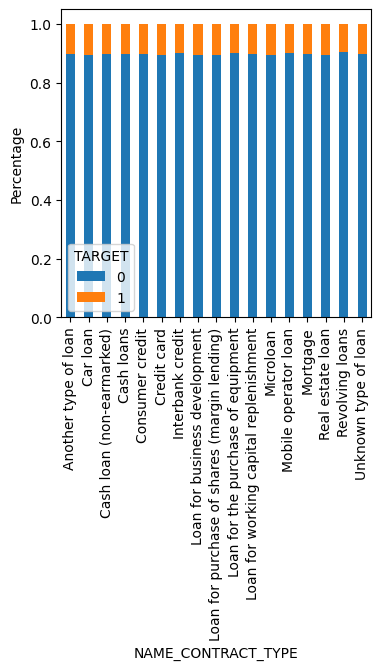

In [44]:
print(pd.crosstab(combined_df["enquiry_type"],combined_df["TARGET"]))
Gender = pd.crosstab(combined_df["enquiry_type"], combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Percentage")
plt.show()

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_11667/524708139.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_bins)


TARGET           0     1
enquiry_amt             
0            54233  6257
1            58999  7014
2            59335  6829
3            57659  6580
4             2566   198
5             2468   202
6             2542   204
7             2440   221
8             2485   192
9             2541   171


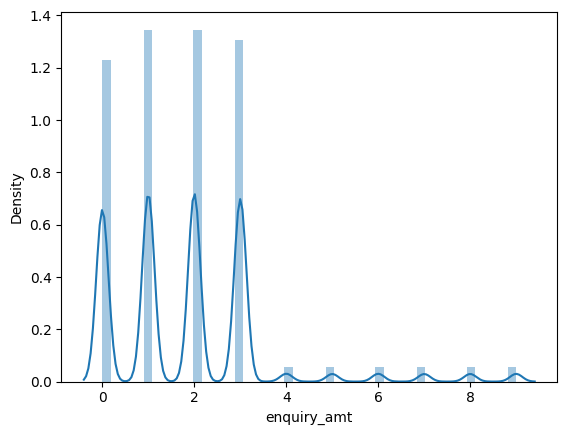

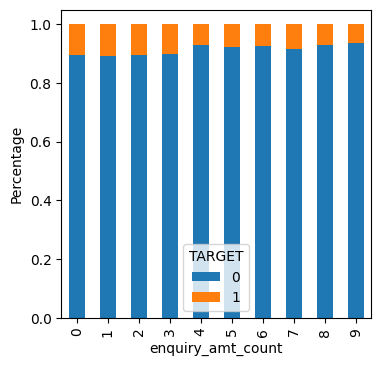

In [46]:
count_bins = pd.cut(combined_df['enquiry_amt'], bins=10, labels=False)
sns.distplot(count_bins)
print(pd.crosstab(count_bins,combined_df["TARGET"]))
Gender = pd.crosstab(count_bins, combined_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("enquiry_amt_count")
plt.ylabel("Percentage")
plt.show()

In [73]:
fil_combined_df = combined_df[['enquiry_amt', 'TARGET', 'uid' ]]

In [77]:
fil_combined_agg = fil_combined_df.groupby(['uid'])

fil_combined_agg = fil_combined_agg.agg({
    'enquiry_amt': ['count', 'mean'],
    'TARGET': 'max'
})

In [78]:
fil_combined_agg

enquiry_amt                TARGET
                  count           mean    max
uid                                          
AAA08065248          11  187696.181818      0
AAA76484169           1  130000.000000      0
AAB14628022           6   43500.000000      0
AAB64746748          12   74500.000000      0
AAB78109665           4  100000.000000      0
...                 ...            ...    ...
ZZX66898933           1   90000.000000      1
ZZX91790155          15  106600.000000      0
ZZY02120250           2  347689.500000      0
ZZZ26208744           5   93400.000000      0
ZZZ74133043          13  268489.846154      1

[37465 rows x 3 columns]

In [79]:
new_columns = [f'{level1}_{level2}' for level1, level2 in fil_combined_agg.columns]
new_columns

fil_combined_agg.columns = new_columns
fil_combined_agg = fil_combined_agg.reset_index()
fil_combined_agg

,uid,enquiry_amt_count,enquiry_amt_mean,TARGET_max
0,AAA08065248,11,187696.181818,0
1,AAA76484169,1,130000.000000,0
2,AAB14628022,6,43500.000000,0
3,AAB64746748,12,74500.000000,0
4,AAB78109665,4,100000.000000,0
...,...,...,...,...
37460,ZZX66898933,1,90000.000000,1
37461,ZZX91790155,15,106600.000000,0
37462,ZZY02120250,2,347689.500000,0
37463,ZZZ26208744,5,93400.000000,0


In [123]:
new_can_enquiry_data_agg_df['enquiry_amt_mean'] = new_can_enquiry_data_agg_df['enquiry_amt_mean'].astype(int)

In [124]:
new_can_enq_train_df = pd.merge(new_can_enquiry_data_agg_df, new_can_train_df, on='uid', how='left')

In [125]:
new_can_enq_train_df

,uid,enquiry_amt_count,enquiry_amt_mean,NAME_CONTRACT_TYPE,TARGET
0,AAA08065248,11,187696,Revolving loans,0
1,AAA76484169,1,130000,Cash loans,0
2,AAB14628022,6,43500,Cash loans,0
3,AAB64746748,12,74500,Cash loans,0
4,AAB78109665,4,100000,Cash loans,0
...,...,...,...,...,...
37460,ZZX66898933,1,90000,Cash loans,1
37461,ZZX91790155,15,106600,Cash loans,0
37462,ZZY02120250,2,347689,Revolving loans,0
37463,ZZZ26208744,5,93400,Cash loans,0


#### target and contract type

TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans          30126  3536
Revolving loans      3539   264


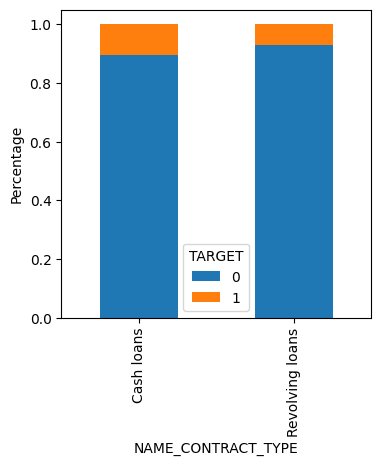

In [126]:
print(pd.crosstab(new_can_enq_train_df["NAME_CONTRACT_TYPE"],new_can_enq_train_df["TARGET"]))
Gender = pd.crosstab(new_can_enq_train_df["NAME_CONTRACT_TYPE"], new_can_enq_train_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Percentage")
plt.show()

#### target and enquiry_amt_count

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_7811/4125606184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_bins)


<Axes: xlabel='enquiry_amt_count', ylabel='Density'>

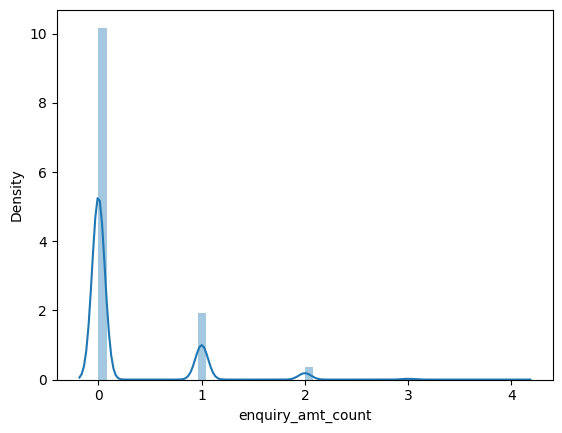

In [42]:
count_bins = pd.cut(new_can_enq_train_df['enquiry_amt_count'], bins=5, labels=False)
sns.distplot(count_bins)

TARGET                 0     1
enquiry_amt_count             
0                  27421  3083
1                   5160   589
2                    964   109
3                    110    18
4                     10     1


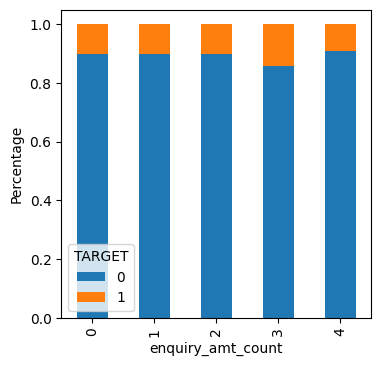

In [43]:

print(pd.crosstab(count_bins,new_can_enq_train_df["TARGET"]))
Gender = pd.crosstab(count_bins, new_can_enq_train_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("enquiry_amt_count")
plt.ylabel("Percentage")
plt.show()

#### target and enquiry_amt_mean

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_7811/3304842550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amt_bins)


<Axes: xlabel='enquiry_amt_mean', ylabel='Density'>

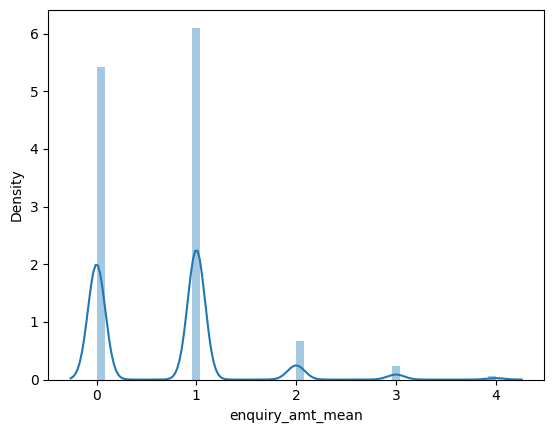

In [44]:
amt_bins = pd.cut(new_can_enq_train_df['enquiry_amt_mean'], bins=5, labels=False)
sns.distplot(amt_bins)

TARGET                0     1
enquiry_amt_mean             
0                 14573  1688
1                 16384  1913
2                  1862   133
3                   660    49
4                   186    17


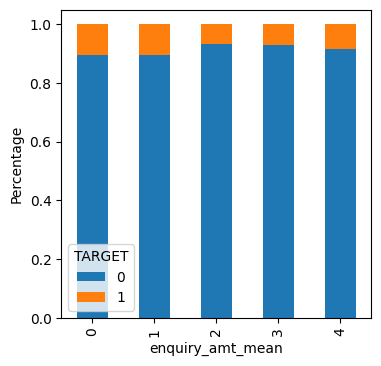

In [50]:
print(pd.crosstab(amt_bins,new_can_enq_train_df["TARGET"]))
Gender = pd.crosstab(amt_bins, new_can_enq_train_df["TARGET"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("enquiry_amt_mean")
plt.ylabel("Percentage")
plt.show()

In [46]:
new_can_enq_train_df

,uid,enquiry_amt_count,enquiry_amt_mean,NAME_CONTRACT_TYPE,TARGET
0,AAA08065248,11,187696.181818,Revolving loans,0
1,AAA76484169,1,130000.000000,Cash loans,0
2,AAB14628022,6,43500.000000,Cash loans,0
3,AAB64746748,12,74500.000000,Cash loans,0
4,AAB78109665,4,100000.000000,Cash loans,0
...,...,...,...,...,...
37460,ZZX66898933,1,90000.000000,Cash loans,1
37461,ZZX91790155,15,106600.000000,Cash loans,0
37462,ZZY02120250,2,347689.500000,Revolving loans,0
37463,ZZZ26208744,5,93400.000000,Cash loans,0


In [118]:
new_can_enq_train_df['log_enquiry_amt_mean'] = np.log(new_can_enq_train_df['enquiry_amt_mean'])

In [119]:
new_can_enq_train_df

,uid,enquiry_amt_count,enquiry_amt_mean,NAME_CONTRACT_TYPE,TARGET,log_enquiry_amt_mean
0,AAA08065248,11,187696.181818,Revolving loans,0,12.142580
1,AAA76484169,1,130000.000000,Cash loans,0,11.775290
2,AAB14628022,6,43500.000000,Cash loans,0,10.680516
3,AAB64746748,12,74500.000000,Cash loans,0,11.218554
4,AAB78109665,4,100000.000000,Cash loans,0,11.512925
...,...,...,...,...,...,...
37460,ZZX66898933,1,90000.000000,Cash loans,1,11.407565
37461,ZZX91790155,15,106600.000000,Cash loans,0,11.576839
37462,ZZY02120250,2,347689.500000,Revolving loans,0,12.759065
37463,ZZZ26208744,5,93400.000000,Cash loans,0,11.444647


#### feature engineering

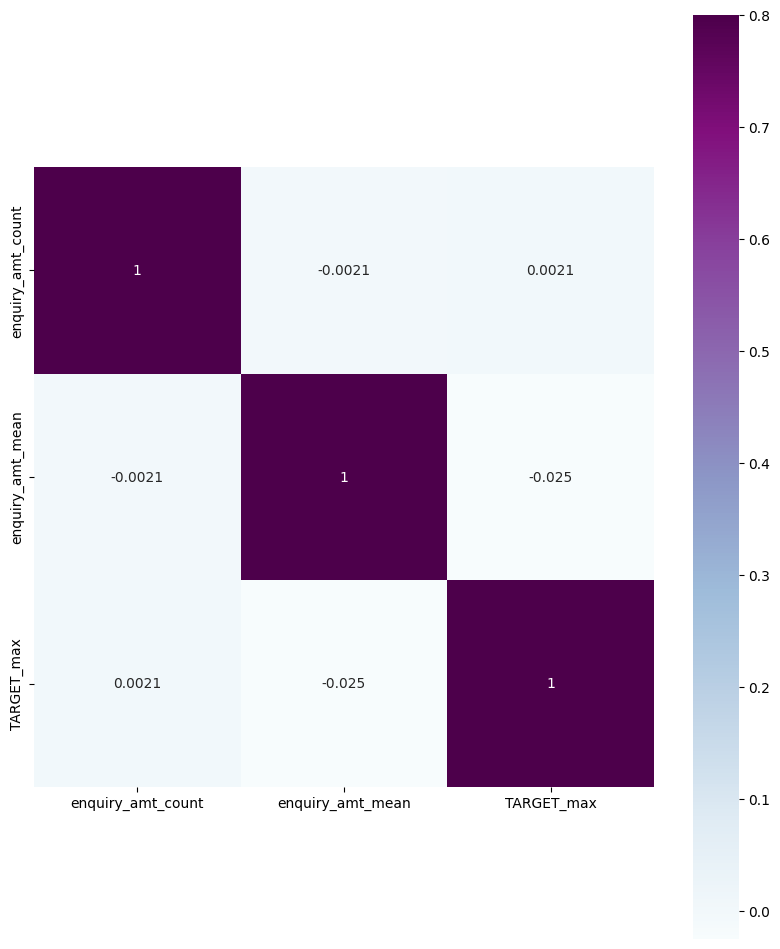

In [81]:
matrix = fil_combined_agg.drop(columns=[ 'uid']).corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

#### modelling

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
# Step 2: Split the dataset into training and testing sets
# Assuming 'target_column' is the target variable and 'categorical_column' is the categorical column
X = fil_combined_agg.drop(columns=['TARGET_max', 'uid'])
y = fil_combined_agg['TARGET_max']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, shuffle=True, stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


# X_train['NAME_CONTRACT_TYPE'] = pd.Categorical(X_train['NAME_CONTRACT_TYPE'])
# # X_train['NAME_CONTRACT_TYPE'] = X_train['NAME_CONTRACT_TYPE'].cat.codes

# X_test['NAME_CONTRACT_TYPE'] = pd.Categorical(X_test['NAME_CONTRACT_TYPE'])
# # X_test['NAME_CONTRACT_TYPE'] = X_test['NAME_CONTRACT_TYPE'].cat.codes

# # Initialize OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the data
# one_hot_encoded = encoder.fit_transform(X_train[['NAME_CONTRACT_TYPE']])

# # Convert the result to DataFrame
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['NAME_CONTRACT_TYPE']))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# X_train = pd.concat([X_train, one_hot_encoded_df], axis=1)

# # Remove the original 'category' column
# X_train.drop(columns=['NAME_CONTRACT_TYPE'], inplace=True)


# one_hot_encoded = encoder.transform(X_test[['NAME_CONTRACT_TYPE']])
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['NAME_CONTRACT_TYPE']))
# X_test = pd.concat([X_test, one_hot_encoded_df], axis=1)
# X_test.drop(columns=['NAME_CONTRACT_TYPE'], inplace=True)


X_resampled, _,  y_resampled, _ = train_test_split(X_train, y_train, train_size=0.08, random_state=42, shuffle=True, stratify=y_train)

X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)


# # Perform random undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)




# pipe = make_pipeline(
#     ColumnTransformer(
#         transformers=[
#             ("one-hot-encode", OneHotEncoder(), ["NAME_CONTRACT_TYPE"]),
#         ],
#         remainder="passthrough",
#     ),
#     RandomForestClassifier(),
# )
# pipe.fit(X_resampled.reset_index(drop=True)[:400], y_resampled.reset_index(drop=True)[:400])

clf = LogisticRegression()
# # clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)




# # Step 4: Build a logistic regression model
# model = LogisticRegression()
# model.fit(X_train_final, y_train)



LogisticRegression()

In [84]:
# # Step 5: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5074276735950972


In [114]:

dict(zip(clf.feature_names_in_, [abs(coe) for coe in clf.coef_[0]]))

{'enquiry_amt_count': 0.0015352274253273095,
 'enquiry_amt_mean': 1.3874394789737462e-06,
 'NAME_CONTRACT_TYPE_Cash loans': 0.6156768128144754,
 'NAME_CONTRACT_TYPE_Revolving loans': 0.5820674211983673}

In [75]:
pipe[1].coef_

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [140]:
new_can_enq_train_df = new_can_enq_train_df[['enquiry_amt', 'uid', 'NAME_CONTRACT_TYPE', 'TARGET']]
new_can_enq_train_df

,enquiry_amt,uid,NAME_CONTRACT_TYPE,TARGET
0,168839,AAA08065248,Revolving loans,0
1,268392,AAA08065248,Revolving loans,0
2,36082,AAA08065248,Revolving loans,0
3,180467,AAA08065248,Revolving loans,0
4,227459,AAA08065248,Revolving loans,0
...,...,...,...,...
273131,439084,ZZZ74133043,Revolving loans,1
273132,261841,ZZZ74133043,Revolving loans,1
273133,25848,ZZZ74133043,Revolving loans,1
273134,459673,ZZZ74133043,Revolving loans,1


In [143]:
new_can_grouped_df = new_can_enq_train_df.groupby(['uid'])

new_can_agg_df = new_can_grouped_df.agg({
    'enquiry_amt': ['count', 'mean'],         # Count the number of loans for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    # 'amount_overdue': 'mean',         # Latest closed date for each candidate
    # 'amount_overdue': ,           # Latest closed date for each candidate
    'NAME_CONTRACT_TYPE': 'mode',
    # 'max_pay_delay': 'mean',
    'TARGET': 'mean'
    # 'total_pay_delay_count': 'mean',
    # 'enquiry_amt': ['sum', 'mean'],   # Take the payment history string from the first loan
    # # 'enquiry_amt': ,   # Take the payment history string from the first loan
    # 'loan_to_enquire_percent': 'mean'
})

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [144]:
new_can_agg_df

enquiry_amt               
                  count           mean
uid                                   
AAA08065248          11  187696.181818
AAA76484169           1  130000.000000
AAB14628022           6   43500.000000
AAB64746748          12   74500.000000
AAB78109665           4  100000.000000
...                 ...            ...
ZZX66898933           1   90000.000000
ZZX91790155          15  106600.000000
ZZY02120250           2  347689.500000
ZZZ26208744           5   93400.000000
ZZZ74133043          13  268489.846154

[37465 rows x 2 columns]

In [126]:
enquiry_data_train[enquiry_data_train['uid']=="OBO11031206"]

,enquiry_type,enquiry_amt,enquiry_date,uid
1035296,Loan for purchase of shares (margin lending),96000,2020-03-28,OBO11031206
1035297,Interbank credit,107000,2018-11-23,OBO11031206
1035298,Cash loans,11000,2020-04-14,OBO11031206
1035299,Microloan,43000,2020-02-06,OBO11031206
1035300,Loan for the purchase of equipment,115000,2017-10-14,OBO11031206
1035301,Mortgage,52000,2019-03-13,OBO11031206
1035302,Car loan,83000,2020-07-16,OBO11031206
1035303,Cash loans,83000,2019-09-10,OBO11031206
1035304,Mobile operator loan,104000,2020-10-29,OBO11031206
1035305,Loan for the purchase of equipment,59000,2018-12-19,OBO11031206


In [124]:
enquiry_data_train[enquiry_data_train['uid']=="PJK40550802"]

,enquiry_type,enquiry_amt,enquiry_date,uid
1130588,Credit card,181000,2018-10-23,PJK40550802
1130589,Microloan,147000,2020-07-28,PJK40550802
1130590,Microloan,140000,2019-11-29,PJK40550802
1130591,Mobile operator loan,174000,2020-11-07,PJK40550802
1130592,Cash loans,103000,2020-05-27,PJK40550802
1130593,Consumer credit,149000,2020-08-07,PJK40550802
1130594,Interbank credit,199000,2019-07-08,PJK40550802
1130595,Credit card,150000,2019-03-27,PJK40550802
1130596,Cash loans,140000,2018-11-02,PJK40550802
1130597,Consumer credit,64000,2020-07-18,PJK40550802


## Train Val Dataset splitting

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(all_data.loc[:,~all_data.columns.isin(['uid_loan','NAME_CONTRACT_TYPE','TARGET'])].set_index('uid'), pd.DataFrame(all_data[['TARGET','uid']]).set_index('uid'), test_size=0.3, random_state=42,stratify=train_data['TARGET']) 




In [60]:
new_train_df = pd.merge(train_df, agg_df, left_on=['uid', 'NAME_CONTRACT_TYPE'], right_on=['uid', 'credit_type'], how='inner')

In [61]:
new_train_df

,uid,NAME_CONTRACT_TYPE,TARGET,credit_type,loan_amount_count,loan_amount_mean,amount_overdue_mean,active_loan_sum,max_pay_delay_mean,mean_pay_delay_mean
0,ORJ66415010,Revolving loans,0,Revolving loans,1,1.280475e+05,0.0,0,0.0,0.0
1,RSX29844134,Cash loans,0,Cash loans,1,2.078325e+06,0.0,1,0.0,0.0
2,NQZ47702397,Revolving loans,0,Revolving loans,8,5.886506e+04,0.0,2,0.0,0.0
3,KQQ70293001,Cash loans,0,Cash loans,1,2.567138e+06,0.0,1,0.0,0.0
4,GCM70907344,Cash loans,0,Cash loans,1,1.503000e+06,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
46313,AXT78182753,Cash loans,0,Cash loans,1,1.486620e+06,0.0,0,0.0,0.0
46314,SLN18593507,Revolving loans,0,Revolving loans,7,1.489301e+05,0.0,4,0.0,0.0
46315,SWK95839200,Revolving loans,0,Revolving loans,7,3.645000e+05,0.0,4,0.0,0.0
46316,LDY78194712,Cash loans,0,Cash loans,2,2.357100e+06,0.0,1,0.0,0.0


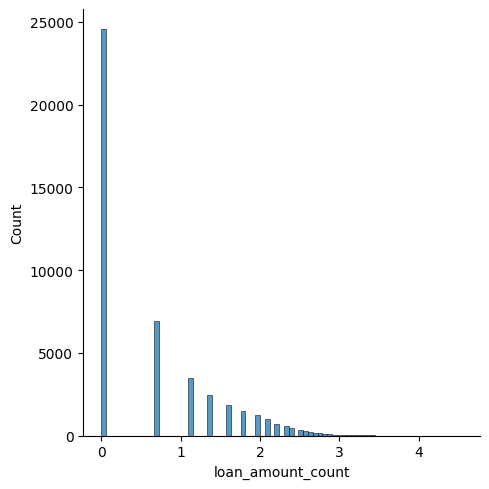

In [69]:
sns.displot(np.log(new_train_df['loan_amount_count']))

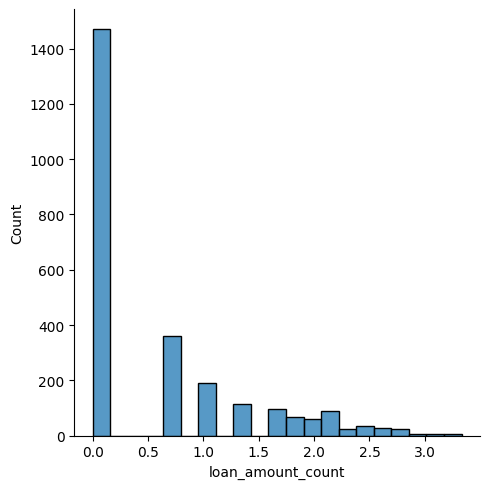

In [70]:
sns.displot(np.log(new_train_df[new_train_df['TARGET']==1]['loan_amount_count']))

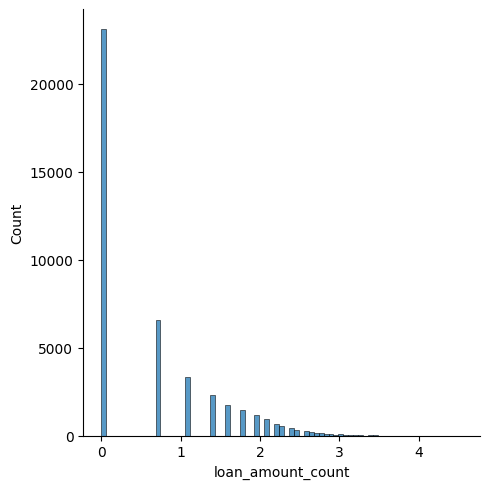

In [71]:
sns.displot(np.log(new_train_df[new_train_df['TARGET']==0]['loan_amount_count']))

/Users/krakesh.kumar/miniconda3/envs/llm_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


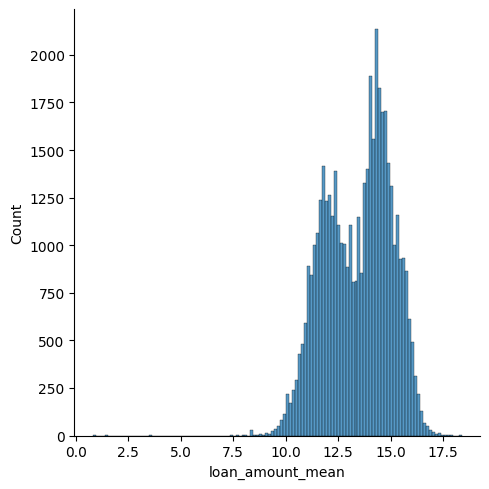

In [72]:
sns.displot(np.log(new_train_df['loan_amount_mean']))

/Users/krakesh.kumar/miniconda3/envs/llm_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


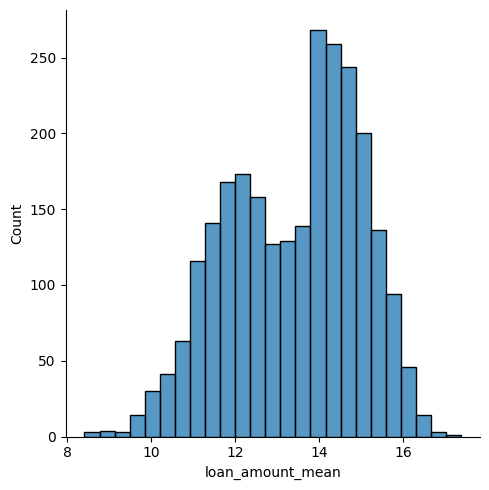

In [79]:
sns.displot(np.log(new_train_df[new_train_df['TARGET']==1]['loan_amount_mean']))

/Users/krakesh.kumar/miniconda3/envs/llm_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


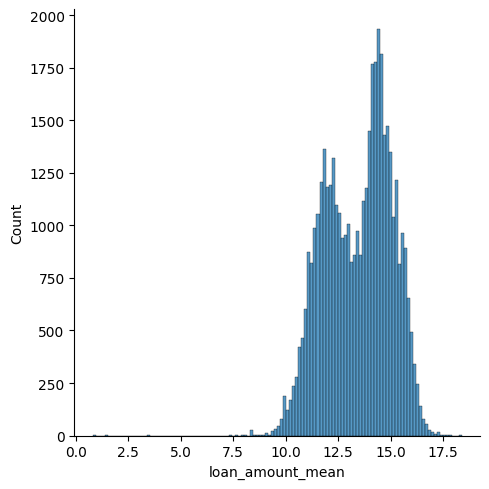

In [74]:
sns.displot(np.log(new_train_df[new_train_df['TARGET']==0]['loan_amount_mean']))

In [67]:
new_train_df[new_train_df['loan_amount_count']!=0]['loan_amount_count'].value_counts()

loan_amount_count
1     24553
2      6955
3      3502
4      2442
5      1841
6      1504
7      1214
8       998
9       715
10      589
11      482
12      349
13      250
14      220
15      149
16      136
17      102
18       73
19       54
20       40
21       34
22       26
23       19
25       13
24       11
27       10
26        9
29        5
30        5
28        3
32        3
31        3
38        2
40        1
49        1
37        1
94        1
33        1
41        1
34        1
Name: count, dtype: int64

In [90]:
accounts_data_train[accounts_data_train['loan_amount']==0]['amount_overdue'].value_counts()

amount_overdue
0.000         47519
4.500             9
9.000             5
72.000            2
49.500            1
238.500           1
47677.500         1
3647.970          1
225.000           1
588019.500        1
117.000           1
171.000           1
202360.500        1
384.300           1
477.000           1
688.500           1
207.000           1
90.000            1
9276.975          1
216.000           1
2.160             1
18.000            1
63.000            1
423.000           1
2110.140          1
274.500           1
112.500           1
432.000           1
643.500           1
2476.575          1
4.275             1
9157.500          1
661.500           1
13.410            1
706198.500        1
4077.585          1
130.500           1
81.000            1
376047.000        1
607.500           1
666.000           1
314.325           1
2134.440          1
247.500           1
2752.650          1
3.015             1
349428.060        1
19111.500         1
373.500           1
8230.

In [94]:
# accounts_data_train.loc[:, 'over_due_percentage'] = accounts_data_train.progress_apply(lambda x: (x['amount_overdue']/x['loan_amount'])*100, axis=1)


In [96]:
accounts_data_train

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,active_loan,repayment_history,max_pay_delay,mean_pay_delay,total_pay_delay_count
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,0,"[0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0,...",10,0.588235,1
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,0,"[0, 0, 0, 0, 0, 14, 44, 0, 0, 0, 0, 0, 0, 0, 0...",44,3.625000,2
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,1,"[0, 0, 0, 0, 0, 0]",0,0.000000,0
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,0,"[0, 0, 0]",0,0.000000,0
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",917,190.486842,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1245305,Consumer credit,100116.000,0.0,2017-05-12,2017-06-15,000,ZZZ93377613,0,[0],0,0.000000,0
1245306,Consumer credit,34839.000,0.0,2016-11-11,2017-12-17,000000000000000000000000000000000000000,ZZZ93377613,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.000000,0
1245307,Consumer credit,18589.500,0.0,2015-12-10,2016-05-12,000000000000000,ZZZ93377613,0,"[0, 0, 0, 0, 0]",0,0.000000,0
1245308,Consumer credit,24997.500,0.0,2020-09-19,NaN,000000000,ZZZ93377613,1,"[0, 0, 0]",0,0.000000,0


In [48]:
accounts_data_train['credit_type'].value_counts()

credit_type
Consumer credit                                 908741
Credit card                                     292422
Car loan                                         20237
Mortgage                                         13196
Microloan                                         7766
Loan for business development                     1466
Another type of loan                               732
Unknown type of loan                               374
Loan for working capital replenishment             320
Real estate loan                                    17
Cash loan (non-earmarked)                           17
Loan for the purchase of equipment                  16
Loan for purchase of shares (margin lending)         4
Interbank credit                                     1
Mobile operator loan                                 1
Name: count, dtype: int64

In [100]:
merged_df = pd.merge(accounts_data_train, enquiry_data_train, left_on=['uid', 'credit_type'],
                     right_on=['uid', 'enquiry_type'], how='outer')


In [101]:
merged_df

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,active_loan,repayment_history,max_pay_delay,mean_pay_delay,total_pay_delay_count,enquiry_type,enquiry_amt,enquiry_date
0,NaN,NaN,NaN,NaN,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Cash loan (non-earmarked),227459.0,2020-05-24
1,NaN,NaN,NaN,NaN,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,168839.0,2020-11-08
2,NaN,NaN,NaN,NaN,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,180467.0,2019-10-22
3,NaN,NaN,NaN,NaN,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,127618.0,2020-10-04
4,NaN,NaN,NaN,NaN,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),315591.0,2019-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126780,Credit card,20700.0,0.0,2016-05-06,2020-02-01,0000000000000000000000000000000000000000000000...,ZZZ93377613,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,Credit card,245594.0,2020-04-23
3126781,NaN,NaN,NaN,NaN,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),416642.0,2017-10-15
3126782,NaN,NaN,NaN,NaN,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),22000.0,2020-08-22
3126783,NaN,NaN,NaN,NaN,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for the purchase of equipment,401073.0,2020-02-23


creating a feature for calculating percentage of enquiry amount got sanctioned

In [102]:
def get_loan_to_enquire_percent(row):
    if np.isnan(row['enquiry_amt']):
        return 100
    if np.isnan(row['loan_amount']):
        return 0
    return (row['loan_amount']/row['enquiry_amt'])*100

In [105]:
merged_df['loan_to_enquire_percent'] = merged_df.progress_apply(get_loan_to_enquire_percent, axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3126785/3126785 [00:12<00:00, 246278.77it/s]


In [133]:
merged_df

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,active_loan,repayment_history,max_pay_delay,mean_pay_delay,total_pay_delay_count,enquiry_type,enquiry_amt,enquiry_date,loan_to_enquire_percent
0,NaN,NaN,NaN,NaT,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Cash loan (non-earmarked),227459.0,2020-05-24,0.000000
1,NaN,NaN,NaN,NaT,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,168839.0,2020-11-08,0.000000
2,NaN,NaN,NaN,NaT,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,180467.0,2019-10-22,0.000000
3,NaN,NaN,NaN,NaT,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Interbank credit,127618.0,2020-10-04,0.000000
4,NaN,NaN,NaN,NaT,NaN,NaN,AAA08065248,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),315591.0,2019-06-12,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126780,Credit card,20700.0,0.0,2016-05-06,2020-02-01,0000000000000000000000000000000000000000000000...,ZZZ93377613,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0,0.0,Credit card,245594.0,2020-04-23,8.428545
3126781,NaN,NaN,NaN,NaT,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),416642.0,2017-10-15,0.000000
3126782,NaN,NaN,NaN,NaT,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for purchase of shares (margin lending),22000.0,2020-08-22,0.000000
3126783,NaN,NaN,NaN,NaT,NaN,NaN,ZZZ93377613,NaN,NaN,NaN,NaN,NaN,Loan for the purchase of equipment,401073.0,2020-02-23,0.000000


In [135]:
merged_df.columns

Index(['credit_type', 'loan_amount', 'amount_overdue', 'open_date',
       'closed_date', 'payment_hist_string', 'uid', 'active_loan',
       'repayment_history', 'max_pay_delay', 'mean_pay_delay',
       'total_pay_delay_count', 'enquiry_type', 'enquiry_amt', 'enquiry_date',
       'loan_to_enquire_percent'],
      dtype='object')

In [136]:
filtered_df = merged_df[['uid', 'loan_amount', 'amount_overdue', 'active_loan', 'max_pay_delay', 'mean_pay_delay',
       'total_pay_delay_count', 'enquiry_amt', 'loan_to_enquire_percent']]

In [138]:
filtered_df = filtered_df.fillna(0)

In [139]:
filtered_df

,uid,loan_amount,amount_overdue,active_loan,max_pay_delay,mean_pay_delay,total_pay_delay_count,enquiry_amt,loan_to_enquire_percent
0,AAA08065248,0.0,0.0,0.0,0.0,0.0,0.0,227459.0,0.000000
1,AAA08065248,0.0,0.0,0.0,0.0,0.0,0.0,168839.0,0.000000
2,AAA08065248,0.0,0.0,0.0,0.0,0.0,0.0,180467.0,0.000000
3,AAA08065248,0.0,0.0,0.0,0.0,0.0,0.0,127618.0,0.000000
4,AAA08065248,0.0,0.0,0.0,0.0,0.0,0.0,315591.0,0.000000
...,...,...,...,...,...,...,...,...,...
3126780,ZZZ93377613,20700.0,0.0,0.0,0.0,0.0,0.0,245594.0,8.428545
3126781,ZZZ93377613,0.0,0.0,0.0,0.0,0.0,0.0,416642.0,0.000000
3126782,ZZZ93377613,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,0.000000
3126783,ZZZ93377613,0.0,0.0,0.0,0.0,0.0,0.0,401073.0,0.000000


In [142]:
filtered_df.columns

Index(['uid', 'loan_amount', 'amount_overdue', 'active_loan', 'max_pay_delay',
       'mean_pay_delay', 'total_pay_delay_count', 'enquiry_amt',
       'loan_to_enquire_percent'],
      dtype='object')

In [170]:
grouped_df = filtered_df.groupby('uid')

agg_df = grouped_df.agg({
    'loan_amount': ['sum', 'count', 'mean'],         # Count the number of loans for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    # 'loan_amount': ,            # Total loan amount for each candidate
    'amount_overdue': ['sum', 'mean'],         # Latest closed date for each candidate
    # 'amount_overdue': ,           # Latest closed date for each candidate
    'active_loan': 'sum',
    'max_pay_delay': 'mean',
    'mean_pay_delay': 'mean',
    'total_pay_delay_count': 'mean',
    'enquiry_amt': ['sum', 'mean'],   # Take the payment history string from the first loan
    # 'enquiry_amt': ,   # Take the payment history string from the first loan
    'loan_to_enquire_percent': 'mean'
})

In [177]:
new_columns = [f'{level1}_{level2}' for level1, level2 in agg_df.columns]
new_columns

agg_df.columns = new_columns
agg_df = agg_df.reset_index()

In [178]:
agg_df

,uid,loan_amount_sum,loan_amount_count,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,active_loan_sum,max_pay_delay_mean,mean_pay_delay_mean,total_pay_delay_count_mean,enquiry_amt_sum,enquiry_amt_mean,loan_to_enquire_percent_mean
0,AAA08065248,0.00,11,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,2064658.0,187696.181818,0.000000
1,AAA09044550,277245.00,27,1.026833e+04,0.0,0.0,0.0,2.000000,0.156046,0.111111,2770000.0,102592.592593,9.250751
2,AAA10545297,161992.89,14,1.157092e+04,0.0,0.0,2.0,0.000000,0.000000,0.000000,1317000.0,94071.428571,10.229013
3,AAA14112888,87543.00,15,5.836200e+03,0.0,0.0,0.0,0.000000,0.000000,0.000000,1465000.0,97666.666667,8.180541
4,AAA20326915,591597.00,9,6.573300e+04,0.0,0.0,3.0,101.888889,21.165205,3.444444,66000.0,7333.333333,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261378,ZZZ74526004,113593.50,10,1.135935e+04,0.0,0.0,0.0,3.300000,0.900000,0.200000,1114000.0,111400.000000,10.517917
261379,ZZZ78449185,649840.50,13,4.998773e+04,0.0,0.0,0.0,0.307692,0.027972,0.076923,2155961.0,165843.153846,53.846154
261380,ZZZ79008454,5016064.50,4,1.254016e+06,127260.0,31815.0,2.0,9.250000,1.297256,0.500000,28000.0,7000.000000,75.000000
261381,ZZZ81253108,7867440.00,32,2.458575e+05,0.0,0.0,3.0,1.500000,0.103125,0.062500,3003000.0,93843.750000,184.667121


/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_2981/2717074762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agg_df['enquiry_amt_mean_bins'])


<Axes: xlabel='enquiry_amt_mean_bins', ylabel='Density'>

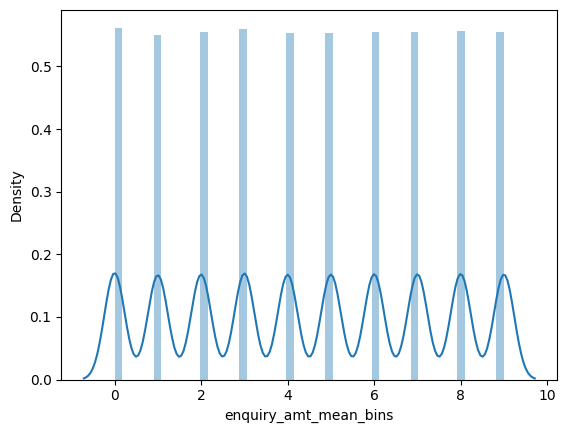

In [259]:
agg_df['enquiry_amt_mean_bins'] = pd.qcut(agg_df['enquiry_amt_mean'], q=10, labels=False)
sns.distplot(agg_df['enquiry_amt_mean_bins'])

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_2981/934904019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agg_df['loan_amount_sum_bins'])


<Axes: xlabel='loan_amount_sum_bins', ylabel='Density'>

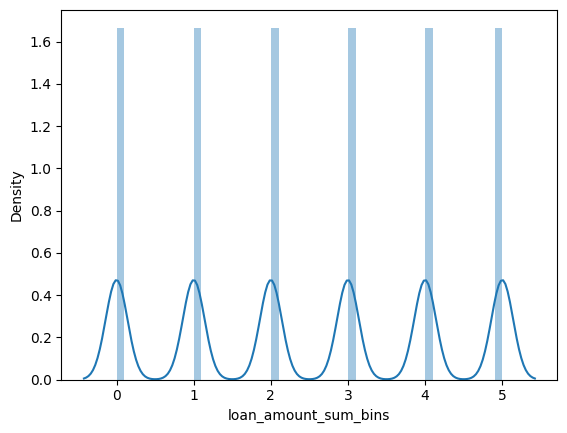

In [266]:
agg_df['loan_amount_sum_bins'] = pd.qcut(agg_df['loan_amount_sum'], q=6, labels=False)
sns.distplot(agg_df['loan_amount_sum_bins'])

In [258]:
agg_df['loan_to_enquire_percent_mean'].value_counts()

loan_to_enquire_percent_mean
0.000000      37731
50.000000     14052
66.666667     10106
75.000000      7774
33.333333      6223
              ...  
834.442816        1
121.281465        1
7.415512          1
142.975690        1
17.493354         1
Name: count, Length: 85804, dtype: int64

In [175]:
agg_df.columns

Index(['loan_amount_sum', 'loan_amount_count', 'loan_amount_mean',
       'amount_overdue_sum', 'amount_overdue_mean', 'active_loan_sum',
       'max_pay_delay_mean', 'mean_pay_delay_mean',
       'total_pay_delay_count_mean', 'enquiry_amt_sum', 'enquiry_amt_mean',
       'loan_to_enquire_percent_mean'],
      dtype='object')

In [186]:
import numpy as np

# Create correlation matrix
corr_matrix = agg_df.drop('uid', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [184]:
agg_df.drop(columns='total_pay_delay_count_mean', axis=1, inplace=True)

In [185]:
agg_df

,uid,loan_amount_sum,loan_amount_count,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,active_loan_sum,max_pay_delay_mean,mean_pay_delay_mean,enquiry_amt_sum,enquiry_amt_mean,loan_to_enquire_percent_mean
0,AAA08065248,0.00,11,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,2064658.0,187696.181818,0.000000
1,AAA09044550,277245.00,27,1.026833e+04,0.0,0.0,0.0,2.000000,0.156046,2770000.0,102592.592593,9.250751
2,AAA10545297,161992.89,14,1.157092e+04,0.0,0.0,2.0,0.000000,0.000000,1317000.0,94071.428571,10.229013
3,AAA14112888,87543.00,15,5.836200e+03,0.0,0.0,0.0,0.000000,0.000000,1465000.0,97666.666667,8.180541
4,AAA20326915,591597.00,9,6.573300e+04,0.0,0.0,3.0,101.888889,21.165205,66000.0,7333.333333,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...
261378,ZZZ74526004,113593.50,10,1.135935e+04,0.0,0.0,0.0,3.300000,0.900000,1114000.0,111400.000000,10.517917
261379,ZZZ78449185,649840.50,13,4.998773e+04,0.0,0.0,0.0,0.307692,0.027972,2155961.0,165843.153846,53.846154
261380,ZZZ79008454,5016064.50,4,1.254016e+06,127260.0,31815.0,2.0,9.250000,1.297256,28000.0,7000.000000,75.000000
261381,ZZZ81253108,7867440.00,32,2.458575e+05,0.0,0.0,3.0,1.500000,0.103125,3003000.0,93843.750000,184.667121


/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_2981/3641679410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agg_df["loan_to_enquire_percent_mean"])


<Axes: xlabel='loan_to_enquire_percent_mean', ylabel='Density'>

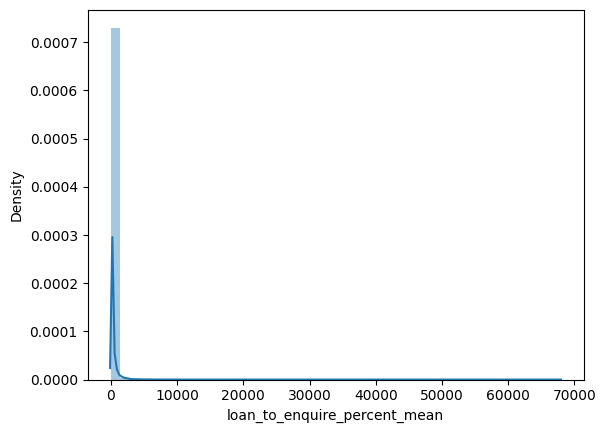

In [235]:
sns.distplot(agg_df["loan_to_enquire_percent_mean"])

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_2981/3197550586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(agg_df["enquiry_amt_mean"])


<Axes: xlabel='enquiry_amt_mean', ylabel='Density'>

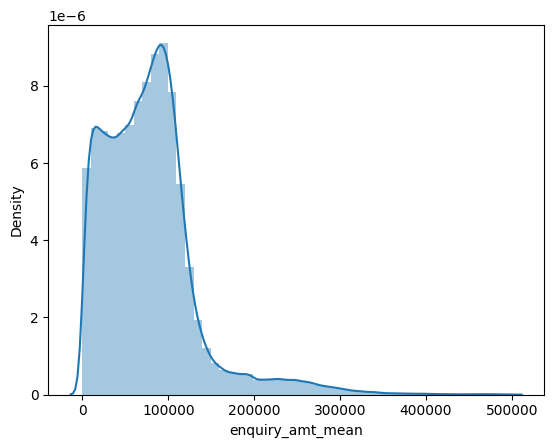

In [220]:
sns.distplot(agg_df["enquiry_amt_mean"])

/var/folders/zv/qqcpct496vj9480y4z8rpd2w0000gp/T/ipykernel_2981/1875371351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(agg_df["enquiry_amt_mean"]))


<Axes: xlabel='enquiry_amt_mean', ylabel='Density'>

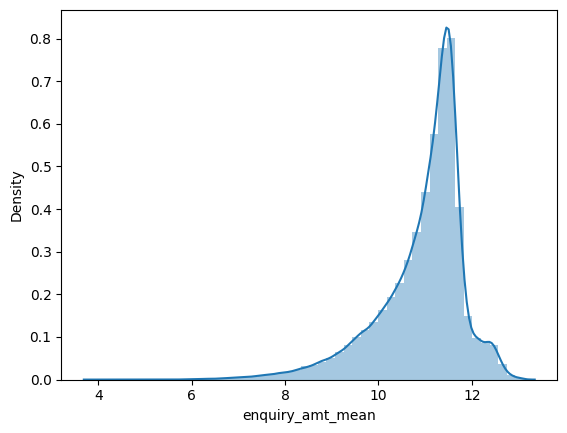

In [221]:
sns.distplot(np.log(agg_df["enquiry_amt_mean"]))

NameError: name 'plt' is not defined

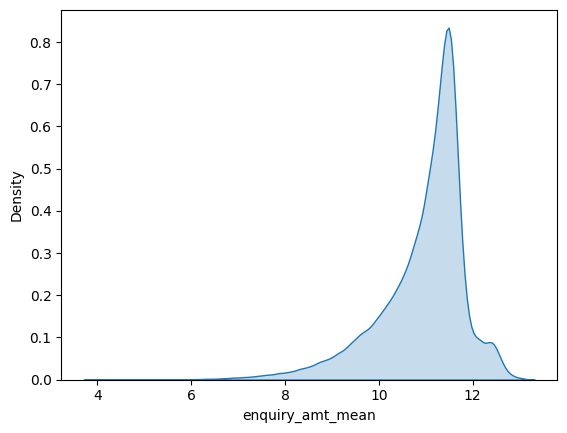

In [233]:
sns.kdeplot(np.log(agg_df["enquiry_amt_mean"]), bw_adjust=0.9, fill=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Normalized Distribution Plot')

# Show plot
plt.show()

### merging with train df

In [187]:
train_df.head()

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0


In [188]:
new_train_df = pd.merge(train_df, agg_df, on='uid')

In [189]:
new_train_df = new_train_df.drop('uid', axis=1)

In [190]:
new_train_df

,NAME_CONTRACT_TYPE,TARGET,loan_amount_sum,loan_amount_count,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,active_loan_sum,max_pay_delay_mean,mean_pay_delay_mean,enquiry_amt_sum,enquiry_amt_mean,loan_to_enquire_percent_mean
0,Cash loans,0,4.500000e+05,3,1.500000e+05,0.0,0.0,1.0,0.000000,0.000000,271000.0,90333.333333,33.333333
1,Cash loans,0,1.101555e+05,4,2.753888e+04,0.0,0.0,0.0,0.000000,0.000000,433000.0,108250.000000,25.000000
2,Cash loans,0,1.037835e+05,5,2.075670e+04,0.0,0.0,0.0,0.000000,0.000000,482000.0,96400.000000,20.000000
3,Cash loans,0,6.728760e+05,4,1.682190e+05,0.0,0.0,1.0,0.000000,0.000000,148000.0,37000.000000,75.000000
4,Cash loans,0,0.000000e+00,22,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,2427000.0,110318.181818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261378,Cash loans,0,0.000000e+00,16,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,1640000.0,102500.000000,0.000000
261379,Cash loans,0,3.290328e+06,21,1.566823e+05,0.0,0.0,2.0,0.000000,0.000000,1812000.0,86285.714286,196.504077
261380,Cash loans,0,2.037290e+07,66,3.086803e+05,0.0,0.0,8.0,7.272727,0.757576,7299000.0,110590.909091,273.685608
261381,Revolving loans,0,1.147833e+07,5,2.295666e+06,0.0,0.0,4.0,0.000000,0.000000,206231.0,41246.200000,80.000000


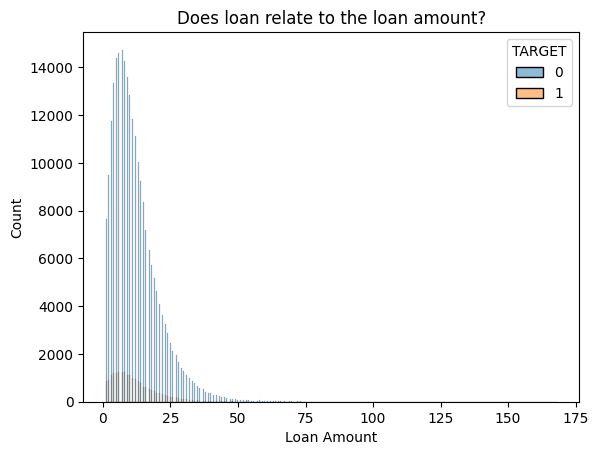

In [270]:
sns.histplot(new_train_df, x='loan_amount_count', hue='TARGET')
plt.title("Does loan relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

In [191]:
new_train_df.columns

Index(['NAME_CONTRACT_TYPE', 'TARGET', 'loan_amount_sum', 'loan_amount_count',
       'loan_amount_mean', 'amount_overdue_sum', 'amount_overdue_mean',
       'active_loan_sum', 'max_pay_delay_mean', 'mean_pay_delay_mean',
       'enquiry_amt_sum', 'enquiry_amt_mean', 'loan_to_enquire_percent_mean'],
      dtype='object')

### Modelling

In [324]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
# Step 2: Split the dataset into training and testing sets
# Assuming 'target_column' is the target variable and 'categorical_column' is the categorical column
X = new_train_df.drop(columns=['TARGET', 'NAME_CONTRACT_TYPE'])
y = new_train_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)



under_sampler = RandomUnderSampler(random_state=42)

# Perform random undersampling
X_resampled, y_resampled = under_sampler.fit_resample(X_train[:20000], y_train[:20000])




# pipe = make_pipeline(
#     ColumnTransformer(
#         transformers=[
#             ("one-hot-encode", OneHotEncoder(), ["NAME_CONTRACT_TYPE"]),
#         ],
#         remainder="passthrough",
#     ),
#     LogisticRegression(),
# )
# pipe.fit(X_train, y_train)

clf = LogisticRegression()
# clf = RandomForestClassifier()
clf.fit(X_resampled.reset_index(drop=True), y_resampled.reset_index(drop=True))




# # Step 4: Build a logistic regression model
# model = LogisticRegression()
# model.fit(X_train_final, y_train)


/Users/krakesh.kumar/miniconda3/envs/llm_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [325]:
X_resampled.reset_index(drop=True)

,loan_amount_sum,loan_amount_count,loan_amount_mean,amount_overdue_sum,amount_overdue_mean,active_loan_sum,max_pay_delay_mean,mean_pay_delay_mean,enquiry_amt_sum,enquiry_amt_mean,loan_to_enquire_percent_mean
0,3163617.315,16,197726.082187,0.0,0.0,4.0,0.000000,0.000000,1127254.0,70453.375000,68.750000
1,350534.565,6,58422.427500,0.0,0.0,0.0,0.000000,0.000000,406000.0,67666.666667,50.000000
2,0.000,7,0.000000,0.0,0.0,0.0,0.000000,0.000000,741000.0,105857.142857,0.000000
3,330075.000,4,82518.750000,0.0,0.0,1.0,0.000000,0.000000,115000.0,28750.000000,75.000000
4,1561500.000,19,82184.210526,0.0,0.0,1.0,0.842105,0.280702,1712000.0,90105.263158,20.880069
...,...,...,...,...,...,...,...,...,...,...,...
3237,147267.900,1,147267.900000,0.0,0.0,0.0,0.000000,0.000000,82000.0,82000.000000,179.595000
3238,2261755.980,19,119039.788421,0.0,0.0,6.0,2.736842,0.243421,234000.0,12315.789474,78.947368
3239,630000.000,16,39375.000000,0.0,0.0,2.0,41.625000,8.400000,2057000.0,128562.500000,216.562500
3240,2472439.500,17,145437.617647,0.0,0.0,3.0,5.529412,0.253676,1721000.0,101235.294118,193.571091


In [326]:

# # Step 5: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5260962097522777


In [323]:
y_train[:1000].value_counts()

TARGET
0    934
1     66
Name: count, dtype: int64

In [255]:

dict(zip(clf.feature_names_in_, [abs(coe) for coe in clf.coef_[0]]))

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [194]:
dict(zip(clf.feature_names_in_, [abs(coe) for coe in clf.coef_[0]]))

{'loan_amount_sum': 8.415391460468433e-08,
 'loan_amount_count': 0.0003962480510819551,
 'loan_amount_mean': 5.499696104142674e-06,
 'amount_overdue_sum': 7.831937636423378e-06,
 'amount_overdue_mean': 7.887893983659014e-05,
 'active_loan_sum': 5.282968804918331e-05,
 'max_pay_delay_mean': 0.00017417399089039108,
 'mean_pay_delay_mean': 2.6891017148139083e-05,
 'enquiry_amt_sum': 5.690537549111867e-08,
 'enquiry_amt_mean': 2.2199350640350284e-05,
 'loan_to_enquire_percent_mean': 0.0018437006362089497}

In [25]:
test_df = pd.read_csv("data/test/test_flag.csv")

In [26]:
test_df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         41707
Revolving loans     4420
Name: count, dtype: int64

In [27]:
test_df

,uid,NAME_CONTRACT_TYPE
0,CMO22835242,Cash loans
1,MRJ34316727,Cash loans
2,UAV00534378,Cash loans
3,IPQ08190402,Cash loans
4,NQN84331006,Cash loans
...,...,...
46122,IQY03739314,Cash loans
46123,QIL15152190,Cash loans
46124,HMM67531434,Cash loans
46125,WWW87911447,Cash loans
